In [3]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

## 11. 불리언 값으로 선택하기

In [139]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2],
                [-12, -4], [3, 4]])
print(names)
data

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']


array([[  4,   7],
       [  0,   2],
       [ -5,   6],
       [  0,   0],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [140]:
names == "Bob"

array([ True, False, False,  True, False, False, False])

In [141]:
# 불리언배열에서 True인 부분만 반환
data[names == "Bob"]

array([[4, 7],
       [0, 0]])

## 12. 불리언 배열을 포함한 다차원 색인

In [142]:
data[names == "Bob", 1:]

array([[7],
       [0]])

In [143]:
data[names == "Bob", 1]

array([7, 0])

## 13. != 조건 연산자나, ~와 같은 불리언 연산자를 활용 

In [144]:
names != "Bob"

array([False,  True,  True, False,  True,  True,  True])

In [145]:
~(names == "Bob")

array([False,  True,  True, False,  True,  True,  True])

In [146]:
data[~(names == "Bob")]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

### 불리언 배열을 따로 변수로 지정해서 활용

In [147]:
cond = names == "Bob"

In [148]:
cond

array([ True, False, False,  True, False, False, False])

In [149]:
data[~cond]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

### and나 or은 사용할 수 없음, &나 |를 사용

In [150]:
mask = (names == "Bob") | (names == "Will") 
print(mask)
data[mask]

[ True False  True  True  True False False]


array([[ 4,  7],
       [-5,  6],
       [ 0,  0],
       [ 1,  2]])

### 불리언값 선택과 브로드캐스팅

In [151]:
print(data)
data < 0

[[  4   7]
 [  0   2]
 [ -5   6]
 [  0   0]
 [  1   2]
 [-12  -4]
 [  3   4]]


array([[False, False],
       [False, False],
       [ True, False],
       [False, False],
       [False, False],
       [ True,  True],
       [False, False]])

In [152]:
data[data < 0] = 0
data

array([[4, 7],
       [0, 2],
       [0, 6],
       [0, 0],
       [1, 2],
       [0, 0],
       [3, 4]])

In [153]:
print(names != "Joe")
data[names != "Joe"] = 7
data

[ True False  True  True  True False False]


array([[7, 7],
       [0, 2],
       [7, 7],
       [7, 7],
       [7, 7],
       [0, 0],
       [3, 4]])

In [154]:
# 3p 예제
name = np.array(['Bob', 'Steven', 'Susan', 'Stella'])
sex = np.array(['M', 'M', 'F', 'F'])
age = np.array([36, 22, 42, 26])
print(name[age>30])
print(sex[~((name =='Susan')| (name =='Stella'))])
print(age[sex=='F'])

['Bob' 'Susan']
['M' 'M']
[42 26]


## 14.  팬시 색인

In [155]:
arr = np.zeros((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [156]:
# 정수배열에 해당하는 요소 반환
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [157]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [158]:
ex = np.array([[[1,2,3,],[4,5,6]],[[7,8,9],[10,11,12]],[[13,14,15],[16,17,18]]])
ex[[0, 2]]

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[13, 14, 15],
        [16, 17, 18]]])

## 15. 다차원 팬시 색인

### reshape 메서드 활용 (파라미터로 튜플형태의 shape, 해당 shape에 맞게 재배열)

In [159]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [160]:
# 1번 축에선 [1,5,7,2], 2번 축에선 [0,3,1,2]
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [161]:
# 1번 축에선 [1,5,7,2], 2번 축 전체에서 [0,3,1,2] 순으로
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [162]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]] = 0
arr

array([[ 0,  1,  2,  3],
       [ 0,  5,  6,  7],
       [ 8,  9,  0, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22,  0],
       [24, 25, 26, 27],
       [28,  0, 30, 31]])

## 16. 행렬의 전치 (transpose), 배열 축 바꾸기  
모두 arr 자체엔 영향 X

In [163]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [164]:
print(arr.T)
arr

[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [165]:
print(arr.transpose())
arr

[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [166]:
# arr.suapaxes(a, b) : a와 b의 축을 바꿈
arr.swapaxes(0, 1)

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

## 17. 행렬의 곱 (np.dot(A,B))

In [167]:
arr = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1]])
print(arr)
np.dot(arr.T, arr)

[[ 0  1  0]
 [ 1  2 -2]
 [ 6  3  2]
 [-1  0 -1]
 [ 1  0  1]]


array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

In [168]:
arr.T.dot(arr)

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

## 18. numpy.random

In [169]:
samples = np.random.standard_normal(size=(4, 4))
samples

array([[-0.2047,  0.4789, -0.5194, -0.5557],
       [ 1.9658,  1.3934,  0.0929,  0.2817],
       [ 0.769 ,  1.2464,  1.0072, -1.2962],
       [ 0.275 ,  0.2289,  1.3529,  0.8864]])

In [170]:
# 같은 수의 난수를 생성시킬 때 random모듈에 비해 훨씬 효율적
from random import normalvariate
N = 1_000_000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.standard_normal(N)

272 ms ± 838 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
14.8 ms ± 39.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [2]:
# 특정 seed를 고정해놓으면, randomness가 포함된 코드를 
# 여러 번 실행해도 같은 결과를 얻음
rng = np.random.default_rng(seed=12345)
data = rng.standard_normal((2, 3))
data

NameError: name 'np' is not defined

In [172]:
data = rng.standard_normal((2, 3))
data

array([[-1.3678,  0.6489,  0.3611],
       [-1.9529,  2.3474,  0.9685]])

In [173]:
# default_rng : 난수 생성기를 생성하는 함수
rng = np.random.default_rng(seed=12345)
data = rng.standard_normal((2, 3))
data

array([[-1.4238,  1.2637, -0.8707],
       [-0.2592, -0.0753, -0.7409]])

In [174]:
type(rng)

numpy.random._generator.Generator

In [175]:
rng.exponential(scale=2, size=(4,4))

array([[2.9086, 0.3987, 3.768 , 3.1228],
       [0.2653, 5.8952, 2.1303, 0.2006],
       [3.3397, 1.0973, 4.1447, 1.6489],
       [0.1539, 0.081 , 0.4394, 1.9865]])

In [177]:
# 5p
# 주어진 자유도 [1, 25, 50, 100]에서 각각의 카이제곱 분포에서 난수를 생성
# (degree_of_freedom, size)
rng.chisquare([1, 25, 50, 100])

array([ 0.753 , 16.834 , 54.9105, 90.3345])

## 19. 유니버설 함수

In [178]:
arr = np.arange(10)
# 루트
np.sqrt(arr)

array([0.    , 1.    , 1.4142, 1.7321, 2.    , 2.2361, 2.4495, 2.6458,
       2.8284, 3.    ])

In [179]:
# exp(x) : e의 x승
np.exp(arr)

array([   1.    ,    2.7183,    7.3891,   20.0855,   54.5982,  148.4132,
        403.4288, 1096.6332, 2980.958 , 8103.0839])

In [180]:
# 표준 정규분포에서 난수 8개 생성
x = rng.standard_normal(8)
y = rng.standard_normal(8)
np.maximum(x, y)

array([1.3471, 0.3129, 0.0709, 1.27  , 0.2775, 0.5303, 0.5367, 0.6184])

In [181]:
arr = rng.standard_normal(7) * 5
print(arr)
# modf : 정수부와 소수부 분리
remainder, whole_part = np.modf(arr)
remainder, whole_part

[-3.9751  1.5002 -8.0135  1.334  -6.3081 -0.3564  2.3702]


(array([-0.9751,  0.5002, -0.0135,  0.334 , -0.3081, -0.3564,  0.3702]),
 array([-3.,  1., -8.,  1., -6., -0.,  2.]))

In [182]:
arr

array([-3.9751,  1.5002, -8.0135,  1.334 , -6.3081, -0.3564,  2.3702])

In [183]:
out = np.zeros_like(arr)
np.add(arr, 1)
# out 매개변수에 결과 할당
np.add(arr, 1, out=out)
out

array([-2.9751,  2.5002, -7.0135,  2.334 , -5.3081,  0.6436,  3.3702])

In [184]:
a = np.zeros_like(arr)
np.add(arr, 1, out=a)
a

array([-2.9751,  2.5002, -7.0135,  2.334 , -5.3081,  0.6436,  3.3702])

## 20. meshgrid 활용 예제     

meshgrid는 for문을 사용하지 않게 해준다!

In [6]:
# arnage(시작, 끝, 간격)
points = np.arange(-5, 5, 0.01) # 100 equally spaced points
xs, ys = np.meshgrid(points, points)
print(xs)
ys

[[-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 ...
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]]


array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [7]:
ys.shape

(1000, 1000)

In [8]:
# z는 원점으로부터의 거리
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

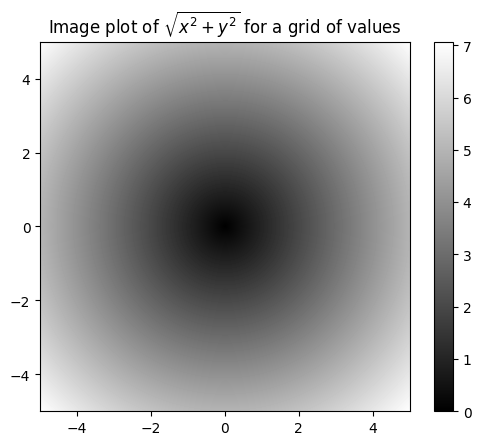

In [9]:
import matplotlib.pyplot as plt
# imshow(시각화할 2D 배열 데이터, cmap=색상매핑, extent=[xmin,xmax,ymin,ymax])
plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [10]:
plt.draw()

<Figure size 640x480 with 0 Axes>

In [11]:
plt.close("all")

## 21. np.where 예제 (조건부 표현하기)

데이터 정제에서 다른 배열에 기반해 새로운 배열을 생성하기 위해 자주 쓰 인다.

In [194]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [195]:
result = [(x if c else y)
        for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [196]:
# np.where(조건, 조건 True일 때, 조건 False일 때)
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [197]:
arr = rng.standard_normal((4, 4))
c = arr > 0
c

array([[False,  True, False, False],
       [ True, False,  True, False],
       [False, False,  True,  True],
       [False, False,  True, False]])

In [198]:
np.where(c, 2, -2)

array([[-2,  2, -2, -2],
       [ 2, -2,  2, -2],
       [-2, -2,  2,  2],
       [-2, -2,  2, -2]])

In [199]:
np.where(c, 2, arr) # set only positive values to 2

array([[-0.4149,  2.    , -1.6404, -0.8573],
       [ 2.    , -1.1545,  2.    , -1.3884],
       [-0.9074, -1.0954,  2.    ,  2.    ],
       [-1.0658, -0.1815,  2.    , -0.3174]])

## 22.수학메서드와 통계메서드

In [200]:
arr = rng.standard_normal((5, 4))
arr

array([[-0.8158,  0.3866, -0.2236, -0.7017],
       [-1.7957,  0.8183, -0.571 ,  0.0008],
       [-1.0636,  1.3017,  0.7479,  0.9809],
       [-0.1104,  0.4679,  0.8906,  1.023 ],
       [ 0.3124, -0.0619, -0.3595, -0.7486]])

In [201]:
arr.mean()

0.023904572452597517

In [202]:
np.mean(arr)

0.023904572452597517

In [203]:
arr.sum()

0.47809144905195033

### 축을 지정할 수 있음

In [204]:
# axis=1은 행(y)마다 평균, axis=0은 열(x)마다 평균
arr.mean(axis=1)

array([-0.3386, -0.3869,  0.4917,  0.5678, -0.2144])

In [205]:
arr.sum(axis=0)

array([-3.4732,  2.9126,  0.4843,  0.5543])

In [206]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
# cumsum : 누적 합
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [207]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [208]:
print(arr.cumsum(axis=0))
arr.cumsum(axis=1)

[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]


array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])

In [218]:
# 6p 문제
A = np.array([3, 6, 0.7, np.NaN, np.inf])
C1 = np.isnan(A)
C2 = np.isinf(A)
A[C1|C2] = 0
A

array([3. , 6. , 0.7, 0. , 0. ])

In [221]:
# 6p 문제
B = [np.pi, np.pi/2, np.pi/3]
C = np.cos(B)
S = np.sin(B)
np.maximum(C, S, out=C)

array([0.   , 1.   , 0.866])

In [217]:
# 8p 문제
A = np.array([3, 6, 0.7, np.NaN, np.inf])
cond = np.isnan(A) | np.isinf(A)
true = np.mean(A[~cond]) 
A = np.where(cond, true, A)
A

array([3.    , 6.    , 0.7   , 3.2333, 3.2333])

## 23. 불리언 배열 메서드 예제

In [6]:
arr = rng.standard_normal(100)
print((arr > 0).sum()) # Number of positive values
(arr <= 0).sum() # Number of non-positive values

54


46

In [10]:
bools = np.array([False, False, True, False])
bools.any() # 하나 이상 True이면 True 반환

True

In [11]:
bools.all() # 모두 True여야 True 반환

False

## 24. 정렬

In [12]:
arr = rng.standard_normal(6)
arr

array([ 1.5845,  0.2822,  0.9095,  0.3951, -0.6694,  1.5554])

In [13]:
arr.sort()
arr

array([-0.6694,  0.2822,  0.3951,  0.9095,  1.5554,  1.5845])

In [17]:
arr = rng.standard_normal((5, 3))
arr

array([[ 0.2992, -0.8462,  0.1966],
       [-0.8996, -0.2566,  1.6725],
       [-0.3753,  2.0368, -0.4588],
       [-1.1758,  0.0751, -0.409 ],
       [ 1.7565,  0.8609,  1.1813]])

In [18]:
# axis=0: 같은 열(x)마다 정렬
arr.sort(axis=0)
arr

array([[-1.1758, -0.8462, -0.4588],
       [-0.8996, -0.2566, -0.409 ],
       [-0.3753,  0.0751,  0.1966],
       [ 0.2992,  0.8609,  1.1813],
       [ 1.7565,  2.0368,  1.6725]])

In [19]:
# arr.sort()는 arr 원본 배열을 직접 바꿈
arr.sort(axis=1)
arr

array([[-1.1758, -0.8462, -0.4588],
       [-0.8996, -0.409 , -0.2566],
       [-0.3753,  0.0751,  0.1966],
       [ 0.2992,  0.8609,  1.1813],
       [ 1.6725,  1.7565,  2.0368]])

In [20]:
arr2 = np.array([5, -10, 7, 1, 0, -3])
# np.sort(arr)는 arr 원본 배열 변경 X.
sorted_arr2 = np.sort(arr2)
sorted_arr2

array([-10,  -3,   0,   1,   5,   7])

## 25. 집합 연산

In [21]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])
np.unique(names)   

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [22]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
# np.unique(arr) = sorted(set(arr))
# 중복 제거하고 정렬
np.unique(ints)

array([1, 2, 3, 4])

In [23]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [24]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
# np.inld(arr1, arr2): arr1이 arr2에 있는지에따라 T/F 반환
# np.in1d = np.isin
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

In [25]:
np.isin(values,[2,3,6])

array([ True, False, False,  True,  True, False,  True])

## 26. 계단 오르내리기 예제

### 리스트와 for문을 통한 구현 및 그래프

In [11]:
import random
import time
t_start  = time.time()
position = 0
walk     = [position]
nsteps   = 1000000
for _ in range(nsteps):
    step      = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
t_end = time.time()
t_end-t_start

0.3966689109802246

In [28]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

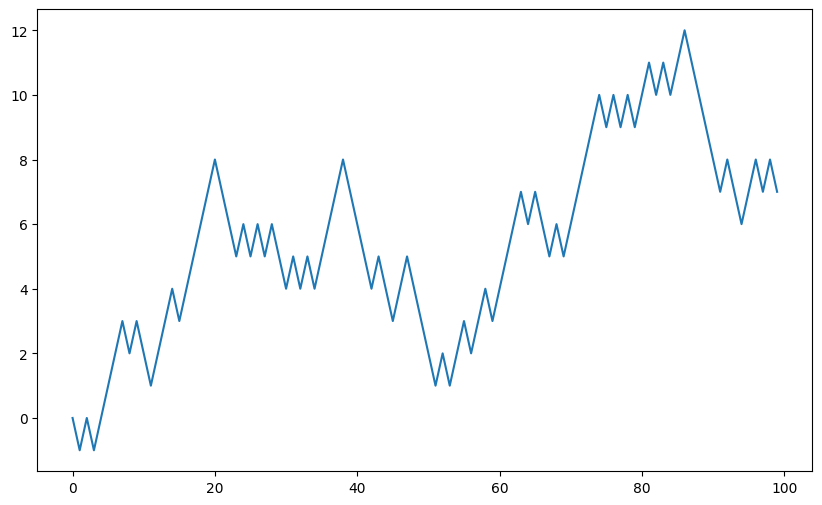

In [29]:
plt.plot(walk[:100])

### 넘파이를 통한 구현

0.008665084838867188


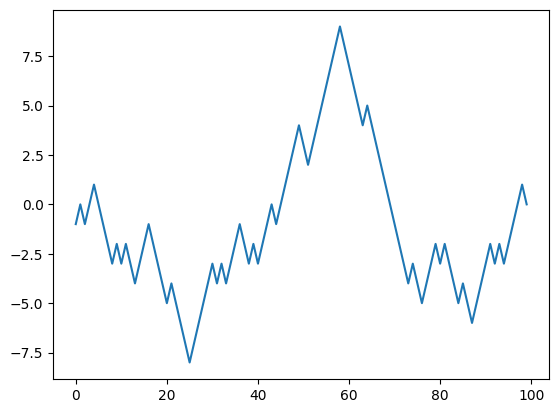

In [12]:
import time
import numpy as np
t_start = time.time()
nsteps  = 1000000
rng     = np.random.default_rng(seed=12345)  # fresh random generator
# rng.integers(0, 2, size=nsteps): 0과 1사이의 정수를 nsteps 만큼 생성
draws = rng.integers(0, 2, size=nsteps)

steps = np.where(draws == 0, 1, -1)
walk  = steps.cumsum()
t_end = time.time()
print(t_end-t_start)
plt.plot(walk[:100])

### 간단한 통계

In [43]:
walk.min()

-251

In [44]:
walk.max()

1363

In [45]:
# np.abs : 절댓값
(np.abs(walk) >= 10).argmax()   # 첫 True의 인덱스 반환

155

In [46]:
print(np.abs(walk).argmax())    # 가장 큰 값의 인덱스 반환
walk[922436]

922436


1363

### 한번에 많이 시뮬레이션하기

In [47]:
n_simulations = 5000
nsteps        = 1000
draws         = rng.integers(0, 2, size=(n_simulations, nsteps)) # 0 or 1
steps         = np.where(draws == 0, 1, -1)
walks         = steps.cumsum(axis=1)    # 행따라 진행
walks

array([[  1,   0,  -1, ...,  66,  67,  66],
       [  1,   2,   3, ...,  48,  49,  50],
       [ -1,  -2,  -3, ..., -30, -29, -28],
       ...,
       [ -1,  -2,  -3, ...,  -2,  -1,  -2],
       [  1,   0,  -1, ..., -40, -41, -40],
       [ -1,   0,  -1, ...,   4,   3,   2]])

In [48]:
walks.max()

120

In [49]:
walks.max(axis=1) # 최댓값이 포함된 행을 반환

array([78, 53,  5, ...,  2, 27, 11])

In [50]:
walks.min()

-114

In [53]:
walks.min(axis=1)

array([ -2,   1, -55, ..., -57, -45, -17])

#### 30칸 이상 넘어가는 최소 스텝 계산

In [62]:
hits30 = (np.abs(walks) >= 30).any(axis=1)
# 행마다 절댓값이 30이상인 요소가 존재하는지 T/F로 표현
hits30

array([ True,  True,  True, ...,  True,  True, False])

In [65]:
print((~hits30).sum())
hits30.sum() # Number that hit 30 or -30

1629


3371

In [71]:
# walks[hits30] : 절댓값이 30이상인 요소가 존재하는 행 반환
# np.abs(walks[hits30]) >= 30:위의 행들에 절댓값 씌우고 30이상인지 여부로 T/F
# .argmax(axis=1) : 행마다 첫 True의 인덱스 반환
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
print((np.abs(walks[hits30]) >= 30)[:, :136])
crossing_times

[[False False False ... False False  True]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


array([135, 321, 369, ..., 403, 373, 487])

In [72]:
crossing_times.mean()

505.19104123405515

### 표준정규분포에 따라 움직이는 random walk

In [13]:
# 13P 
import time
t_start       = time.time()
n_simulations = 5000
nsteps        = 1000
steps = rng.standard_normal(size = (n_simulations, nsteps))
walk  = steps.cumsum()
t_end = time.time()
t_end-t_start

0.05426597595214844